It seems the current [high scoring script][1] is written in R using H2O. So let us do one in python using XGBoost. 

Thanks to [this script][2] for feature engineering ideas. 

We shall start with importing the necessary modules


  [1]: https://www.kaggle.com/gospursgo/two-sigma-connect-rental-listing-inquiries/h2o-starter-pack/run/835757
  [2]: https://www.kaggle.com/aikinogard/two-sigma-connect-rental-listing-inquiries/random-forest-starter-with-numerical-features

In [4]:
import os
import sys
import operator
import numpy as np
import pandas as pd
from scipy import sparse
import xgboost as xgb
from sklearn import model_selection, preprocessing, ensemble
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from XGBoostPackage import xgbClass
from CrossValidation import CVScore

%matplotlib inline

In [5]:
X_train=pd.read_csv('X_train2.csv')
X_test=pd.read_csv('X_test2.csv')
y_train=pd.read_csv('y_train.csv')['interest_level'].ravel()

In [6]:
X_train.shape, y_train.shape

((49352, 74), (49352,))

In [ ]:
#X_train2
param_grid = {'eta':[.03, .02, .01], 'num_round':[1500,2000], 'subsample':[.7], 'colsample_bytree':[.6,.7, .8], \
              'max_depth':[5, 6], 'seed':[2017]}
for eta in param_grid['eta']:
    for subsample in param_grid['subsample']:
        for colsample_bytree in param_grid['colsample_bytree']:
            for max_depth in param_grid['max_depth']:
                for seed in param_grid['seed']:
                    for num_rounds in param_grid['num_round']:
                        model=xgbClass(colsample_bytree=colsample_bytree, eta=eta, eva_metric='mlogloss', \
                                       subsample=subsample, max_depth=max_depth, seed=seed,\
                                       objective='multi:softprob', num_class=3,num_rounds=num_rounds)
                        score=CVScore(model=model, n_splits=3, my_score=log_loss, X_train=X_train[:],\
                                  y_train=y_train[:])
                        del model
                        print('eta={}, subsample={}, colsample_bytree={}, max_depth={}, seed={}, score={}, num_rounds={}'.\
                          format(eta, subsample, colsample_bytree, max_depth, seed, score, num_rounds))

In [10]:
param_grid = {'eta':[.1, .04, .02], 'num_round':[500,1000], 'subsample':[.7], 'colsample_bytree':[.7], \
              'max_depth':[4,5, 6], 'seed':[2017]}
for eta in param_grid['eta']:
    for subsample in param_grid['subsample']:
        for colsample_bytree in param_grid['colsample_bytree']:
            for max_depth in param_grid['max_depth']:
                for seed in param_grid['seed']:
                    for num_rounds in param_grid['num_round']:
                        model=xgbClass(colsample_bytree=colsample_bytree, eta=eta, eva_metric='mlogloss', \
                                       subsample=subsample, max_depth=max_depth, seed=seed,\
                                       objective='multi:softprob', num_class=3,num_rounds=num_rounds)
                        score=CVScore(model=model, n_splits=3, my_score=log_loss, X_train=X_train[:],\
                                  y_train=y_train[:])
                        del model
                        print('eta={}, subsample={}, colsample_bytree={}, max_depth={}, seed={}, score={}, num_rounds={}'.\
                          format(eta, subsample, colsample_bytree, max_depth, seed, score, num_rounds))

eta=0.1, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.540825406417, num_rounds=500
eta=0.1, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.545873966542, num_rounds=1000
eta=0.1, subsample=0.7, colsample_bytree=0.7, max_depth=5, seed=2017, score=0.542463619543, num_rounds=500
eta=0.1, subsample=0.7, colsample_bytree=0.7, max_depth=5, seed=2017, score=0.558406046345, num_rounds=1000
eta=0.1, subsample=0.7, colsample_bytree=0.7, max_depth=6, seed=2017, score=0.550243207701, num_rounds=500
eta=0.1, subsample=0.7, colsample_bytree=0.7, max_depth=6, seed=2017, score=0.584102265197, num_rounds=1000
eta=0.04, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.546367050983, num_rounds=500
eta=0.04, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.539431759275, num_rounds=1000
eta=0.04, subsample=0.7, colsample_bytree=0.7, max_depth=5, seed=2017, score=0.540349950191, num_rounds=500
eta=0.04, subsample=0.7, colsa

KeyboardInterrupt: 

In [12]:
param_grid = {'eta':[.04], 'num_round':[500,1000], 'subsample':[.7], 'colsample_bytree':[.6,.8], \
              'max_depth':[5], 'seed':[2017]}
for eta in param_grid['eta']:
    for subsample in param_grid['subsample']:
        for colsample_bytree in param_grid['colsample_bytree']:
            for max_depth in param_grid['max_depth']:
                for seed in param_grid['seed']:
                    for num_rounds in param_grid['num_round']:
                        model=xgbClass(colsample_bytree=colsample_bytree, eta=eta, eva_metric='mlogloss', \
                                       subsample=subsample, max_depth=max_depth, seed=seed,\
                                       objective='multi:softprob', num_class=3,num_rounds=num_rounds)
                        score=CVScore(model=model, n_splits=3, my_score=log_loss, X_train=X_train[:],\
                                  y_train=y_train[:])
                        del model
                        print('eta={}, subsample={}, colsample_bytree={}, max_depth={}, seed={}, score={}, num_rounds={}'.\
                          format(eta, subsample, colsample_bytree, max_depth, seed, score, num_rounds))

eta=0.039, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.546705558332, num_rounds=500
eta=0.039, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.539388763722, num_rounds=1000
eta=0.039, subsample=0.7, colsample_bytree=0.7, max_depth=5, seed=2017, score=0.540978387466, num_rounds=500
eta=0.039, subsample=0.7, colsample_bytree=0.7, max_depth=5, seed=2017, score=0.537746906981, num_rounds=1000
eta=0.039, subsample=0.7, colsample_bytree=0.7, max_depth=6, seed=2017, score=0.53864647159, num_rounds=500
eta=0.039, subsample=0.7, colsample_bytree=0.7, max_depth=6, seed=2017, score=0.540213157122, num_rounds=1000
eta=0.041, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.546068609062, num_rounds=500
eta=0.041, subsample=0.7, colsample_bytree=0.7, max_depth=4, seed=2017, score=0.539298954759, num_rounds=1000
eta=0.041, subsample=0.7, colsample_bytree=0.7, max_depth=5, seed=2017, score=0.540337122732, num_rounds=500
eta=0.041, subsa

In [9]:
print("Start fitting...")

param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.04
param['max_depth'] = 6
param['silent'] = 1
param['num_class'] = 3
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 1
param['subsample'] = 0.7
param['colsample_bytree'] = 0.7
param['seed'] = 42
param['nthread'] = 8
num_rounds = 500

xgtrain = xgb.DMatrix(X_train[:], label=y_train)
clf = xgb.train(param, xgtrain, num_rounds)

print("Fitted")

def prepare_submission(model):
    xgtest = xgb.DMatrix(X_test[:])
    preds = model.predict(xgtest)    
    sub = pd.DataFrame(data = {'listing_id': X_test['listing_id'].ravel()})
    sub['low'] = preds[:, 0]
    sub['medium'] = preds[:, 1]
    sub['high'] = preds[:, 2]
    sub.to_csv("Apr14_1.csv", index = False, header = True)

prepare_submission(clf)

Start fitting...
Fitted


In [28]:
imp=pd.DataFrame()#(index=features_to_use)
imp['train'] = pd.Series(model.get_score(importance_type='gain'))#, index=features_to_use)
imp = imp.fillna(0)

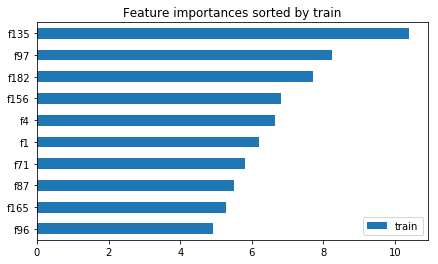

In [30]:
ax=imp.sort_values('train').tail(10).plot.barh(title='Feature importances sorted by train', figsize=(7,4))
